# Fashion Image classification

The fashion imgae data set consists of 10 different items classes. The items included in this data set are T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag and ankle boots. The data set has grey scale images of 28*28 of 10 different catagories/classes. The data set consists of 60,000 images in training set and 10,000 imgaes in test set.

Lets first start by importing all the required libraries

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt


Now we load the test and training data set from Keras

In [23]:
from tensorflow.keras.datasets import fashion_mnist

In [24]:
fashion_data=fashion_mnist

In [37]:
(train_images,train_labels_scalar),(test_images,test_labels_scalar)= fashion_data.load_data()

Now we create a list of classes for further processing

In [38]:
class_names=['T-shirt','Pants','Pullover','Dress','Coats','slipper','Shirt','Snekers','Bag','Boots']

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
len(train_labels_scalar)

60000

In [41]:
test_images.shape

(10000, 28, 28)

In [42]:
len(test_labels_scalar)

10000

In [31]:
train_images=train_images/255
test_images=test_images/255


<function matplotlib.pyplot.show(*args, **kw)>

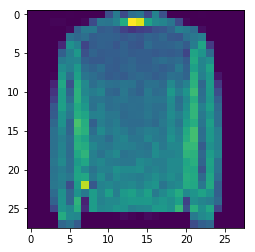

In [32]:
plt.figure()
plt.imshow(train_images[1245])
#plt.colorbar()
#plt.grid(false)
plt.show

We plot a few images from the training data set along with the labels to have a look at the images

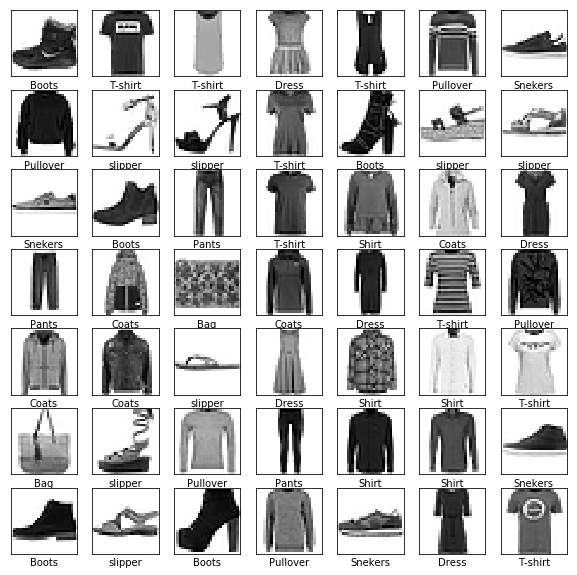

In [36]:
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_scalar[i]])
plt.show()

Now we convert the trest and train lebels into catagorical label. Basically using one hot format to get an array of size 1*10

In [49]:
train_labels = tf.keras.utils.to_categorical(train_labels_scalar, 10)
test_labels = tf.keras.utils.to_categorical(test_labels_scalar, 10)

Now we build a sequential model with about 1 flatten layer and 4 dense fully connected layers. The last layer being the output layer with a softmax acctivation function

In [5]:
model=Sequential()
model.add(Flatten())
model.add(Dense(784,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


Now we assign the optimizerand loss functions for the model being used

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

The next and the final process is to fit the model and find out the test accuracy to validate our model

In [64]:
model.fit(train_images, train_labels,epochs=10, validation_data=(test_images, test_labels))

Epoch 1/100
1875/1875 [==============================] - 12s 7ms/step - accuracy: 0.7393 - loss: 0.7001 - val_loss: 0.5599 - val_accuracy: 0.7986
Epoch 2/100
1875/1875 [==============================] - 13s 7ms/step - accuracy: 0.8260 - loss: 0.4722 - val_loss: 0.4491 - val_accuracy: 0.8361
Epoch 3/100
1875/1875 [==============================] - 13s 7ms/step - accuracy: 0.8476 - loss: 0.4126 - val_loss: 0.4202 - val_accuracy: 0.8425
Epoch 4/100
1875/1875 [==============================] - 13s 7ms/step - accuracy: 0.8602 - loss: 0.3797 - val_loss: 0.3926 - val_accuracy: 0.8578
Epoch 5/100
1875/1875 [==============================] - 13s 7ms/step - accuracy: 0.8690 - loss: 0.3552 - val_loss: 0.3785 - val_accuracy: 0.8632
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - accuracy: 0.8761 - loss: 0.3364 - val_loss: 0.3745 - val_accuracy: 0.8642
Epoch 7/100
1875/1875 [==============================] - 13s 7ms/step - accuracy: 0.8806 - loss: 0.3238 - val_loss: 0.3566 -

KeyboardInterrupt: 

After about 10 epocs we can see the test cauuracy is about 87% and does not increase, but the training accuracy keeps increasing. Hence, to stop over fitting we perform early stopping.

## Convolutional Neural network
In the previous model we used Deep neural networks for image classification. Now we will be using convolutional nerual networks on the fashion data set and compute the difference in the accuracy obtained between both the models

In [11]:
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop


Input shape is basically the size of the image, in our case since the image is a grey scale image, we have 1 channel and 28*28 pixels. The input shape will be (28,28,1)

In [51]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [52]:
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
# 64 3x3 kernels
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model_conv.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model_conv.add(Flatten())
# A hidden layer to learn with
model_conv.add(Dense(128, activation='relu'))
# Another dropout
model_conv.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model_conv.add(Dense(10, activation='softmax'))

Lets now look at our model

In [53]:
model_conv.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [54]:
model_conv.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Lets not train out CNN model

In [56]:
res = model_conv.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=5,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 134s - loss: 0.6403 - accuracy: 0.8015 - val_loss: 0.3573 - val_accuracy: 0.8704
Epoch 2/5
60000/60000 - 144s - loss: 0.3875 - accuracy: 0.8598 - val_loss: 0.3103 - val_accuracy: 0.8872
Epoch 3/5
60000/60000 - 143s - loss: 0.3378 - accuracy: 0.8773 - val_loss: 0.2911 - val_accuracy: 0.8962
Epoch 4/5
60000/60000 - 137s - loss: 0.3136 - accuracy: 0.8857 - val_loss: 0.2932 - val_accuracy: 0.8939
Epoch 5/5
60000/60000 - 141s - loss: 0.2876 - accuracy: 0.8952 - val_loss: 0.2661 - val_accuracy: 0.9032


With just 5 epochs we can see a clear improvement in the accuracy from 87% in DNN to 90.32% in CNN. This the real beauty and power of convolutional neural networks